In [1]:
import os
import sys

import numpy as np
import pandas as pd
from datetime import datetime
import pdb
import xarray as xr
import matplotlib.pyplot as plt
import puv

import solo

sys.path.append(r'c:\checkouts\python\TUD-COASTAL\python')

In [2]:
dataFolder="ps_data/tailored_with_ps_and_vel_UrSkAs/"

ds1 = xr.open_dataset(dataFolder+"ps1.nc")
ds2 = xr.open_dataset(dataFolder+"ps2.nc")
ds3 = xr.open_dataset(dataFolder+"ps3.nc")
ds4 = xr.open_dataset(dataFolder+"ps4.nc")
ds5 = xr.open_dataset(dataFolder+"ps5.nc")
ds6 = xr.open_dataset(dataFolder+"ps6.nc")

display(ds1)

<xarray.Dataset>
Dimensions:         (t: 894, f: 128)
Coordinates:
  * t               (t) datetime64[ns] 2023-09-23T10:09:32 ... 2023-09-29T14:...
  * f               (f) float64 0.0 0.03125 0.0625 0.09375 ... 3.906 3.938 3.969
Data variables: (12/24)
    zi              (t) float64 ...
    zb              (t) float64 ...
    sf              float64 ...
    name            object ...
    h               (t) float64 ...
    vy              (t, f) float64 ...
    ...              ...
    p_sig           (t) float64 ...
    vel_Sk          (t) float64 ...
    vel_As          (t) float64 ...
    vel_sig         (t) float64 ...
    u_k             (t) float64 ...
    u_Ur            (t) float64 ...
Attributes: (12/16)
    Conventions:               CF-1.6
    name:                      ps1
    instrument:                ps1
    instrument type:           Ruskin RBR Solo
    instrument serial number:  202438
    epsg:                      28992
    ...                        ...
    summary:                   Hydraulic fieldwork pressure data, with pressu...
    contact person:            Marlies van der Lugt
    emailadres:                m.a.vanderlugt@tudelft.nl
    construction datetime:     10-Nov-2023 (15:13:47)
    version:                   v1
    version comments:          constructed with xarray

In [3]:
def add_celerity_to_ds(ds, g=9.81):
    """
    Calculates wave height corrected celerity and adds it to the dataset for each burst. An expression for the breaking wave
    celerity is used from Postacchini & Brocchini (2014), equation 10. 
    (https://www.sciencedirect.com/science/article/pii/S0141118714000078#sec0095).
    """
    epsilon = ds.Hm0 / ds.h
    
    fe = 0.10 * epsilon**2 + 0.43 * epsilon + 1
    
    ds['epsilon'] = epsilon
    ds['cb_10'] = np.sqrt(ds.h * g) * fe
    
    ds['epsilon'].attrs = {'units': '-', 'long_name': 'Wave nonlinearity (H/h)', 'comment':'Used to calculate cb_10'}
    ds['cb_10'].attrs = {'units': 'm/s', 'long_name': 'Breaking wave celerity', 'comment':'For a burst period of 10 minutes'}
    
add_celerity_to_ds(ds1)
add_celerity_to_ds(ds2)
add_celerity_to_ds(ds3)
add_celerity_to_ds(ds4)
add_celerity_to_ds(ds5)
add_celerity_to_ds(ds6)

In [4]:
display(ds1)

<xarray.Dataset>
Dimensions:         (t: 894, f: 128)
Coordinates:
  * t               (t) datetime64[ns] 2023-09-23T10:09:32 ... 2023-09-29T14:...
  * f               (f) float64 0.0 0.03125 0.0625 0.09375 ... 3.906 3.938 3.969
Data variables: (12/26)
    zi              (t) float64 0.377 nan nan nan nan ... nan nan nan nan nan
    zb              (t) float64 0.227 nan nan nan nan ... nan nan nan nan nan
    sf              float64 8.0
    name            <U3 'ps1'
    h               (t) float64 0.216 nan nan nan nan ... nan nan nan nan nan
    vy              (t, f) float64 ...
    ...              ...
    vel_As          (t) float64 -1.099 1.584 -0.7776 ... 0.2447 0.3795 0.02183
    vel_sig         (t) float64 0.03645 0.001502 0.001529 ... 0.002556 0.001319
    u_k             (t) float64 0.2912 0.2778 0.2784 ... 0.3433 0.3421 0.3396
    u_Ur            (t) float64 0.4345 0.04113 0.07394 ... 0.1045 0.1363 0.08455
    epsilon         (t) float64 0.02349 nan nan nan nan ... nan nan nan nan nan
    cb_10           (t) float64 1.471 nan nan nan nan ... nan nan nan nan nan
Attributes: (12/16)
    Conventions:               CF-1.6
    name:                      ps1
    instrument:                ps1
    instrument type:           Ruskin RBR Solo
    instrument serial number:  202438
    epsg:                      28992
    ...                        ...
    summary:                   Hydraulic fieldwork pressure data, with pressu...
    contact person:            Marlies van der Lugt
    emailadres:                m.a.vanderlugt@tudelft.nl
    construction datetime:     10-Nov-2023 (15:13:47)
    version:                   v1
    version comments:          constructed with xarray

In [5]:
ncOutFile = "ps_data/tailored_with_c/"

ds1.to_netcdf(ncOutFile + f'{ds1.instrument}' + '.nc')
ds2.to_netcdf(ncOutFile + f'{ds2.instrument}' + '.nc')
ds3.to_netcdf(ncOutFile + f'{ds3.instrument}' + '.nc')
ds4.to_netcdf(ncOutFile + f'{ds4.instrument}' + '.nc')
ds5.to_netcdf(ncOutFile + f'{ds5.instrument}' + '.nc')
ds6.to_netcdf(ncOutFile + f'{ds6.instrument}' + '.nc')

In [6]:
timeslots = pd.read_csv('GoProRecordingTimes.txt', delimiter='; ', skiprows=2)

for i in timeslots.index.values:
    timeslots.iloc[i]['starttime'] = np.datetime64(datetime.strptime(timeslots.iloc[i]['Date'] + ' ' + timeslots.iloc[i]['starttime'] \
                                                       + ':00', '%d-%m-%Y %H:%M:%S'))
    timeslots.iloc[i]['endtime'] = np.datetime64(datetime.strptime(timeslots.iloc[i]['Date'] + ' ' + timeslots.iloc[i]['endtime'] \
                                                       + ':00', '%d-%m-%Y %H:%M:%S'))
timeslots.drop(['Date'], axis=1, inplace=True)
display(timeslots)

bands = []

for (starttime, endtime) in zip(timeslots['starttime'], timeslots['endtime']):
    bands.append((starttime, endtime))
    
bands = bands[3:] 

C:\Users\khdeb\Anaconda3\envs\notebook1\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,starttime,endtime,comment
0,2023-09-23T16:51:00.000000,2023-09-23T18:10:00.000000,video form
1,2023-09-24T11:45:00.000000,2023-09-24T12:12:00.000000,"fish eye (overheated, shut down)"
2,2023-09-24T20:41:00.000000,2023-09-24T20:50:00.000000,linear view testing
3,2023-09-25T10:46:00.000000,2023-09-25T13:47:00.000000,swell
4,2023-09-26T11:49:00.000000,2023-09-26T16:19:00.000000,"swell, clear image of good quality"
5,2023-09-27T13:11:00.000000,2023-09-27T16:36:00.000000,-
6,2023-09-28T14:06:00.000000,2023-09-28T16:26:00.000000,-


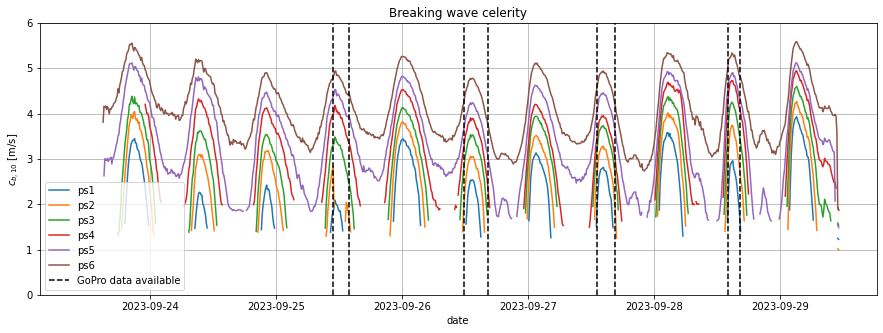

In [7]:
fig, ax = plt.subplots(figsize=(15,5))

ax.set_title('Breaking wave celerity')

ax.plot(ds1.t, ds1.cb_10, label='ps1')
ax.plot(ds2.t, ds2.cb_10, label='ps2')
ax.plot(ds3.t, ds3.cb_10, label='ps3')
ax.plot(ds4.t, ds4.cb_10, label='ps4')
ax.plot(ds5.t, ds5.cb_10, label='ps5')
ax.plot(ds6.t, ds6.cb_10, label='ps6')


for starttime, endtime in bands:
    ax.axvline((starttime), 0, 1, ls='--', color='k')
    ax.axvline((endtime), 0, 1, ls='--', color='k')
    
ax.plot([],[], '--k', label='GoPro data available')

ax.set_ylim(bottom=0, top=6)
ax.grid()


ax.set_xlabel('date')
ax.set_ylabel('$c_{b,10}$ [m/s]')

ax.legend(loc='best')

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.savefig('figures/wave_height_corrected_celerity.png', bbox_inches='tight', facecolor='white', transparent=False)

### Values to compare v_i to v_p

In [8]:
# 2023-09-26, 13:00:00 - 13:02:00
t1 = datetime.strptime('2023-09-26 12:59:32', '%Y-%m-%d %H:%M:%S') 
t2 = datetime.strptime('2023-09-26 13:00:00', '%Y-%m-%d %H:%M:%S')

cb1 = ds1.cb_10.sel(t=t1).values
cb2 = ds2.cb_10.sel(t=t2).values
cb3 = ds3.cb_10.sel(t=t2).values
cb4 = ds4.cb_10.sel(t=t2).values
cb5 = ds5.cb_10.sel(t=t2).values
cb6 = ds6.cb_10.sel(t=t2).values

In [9]:
i = 1

for cb in [cb1, cb2, cb3, cb4, cb5, cb6]:
    print(f'cb (at ps{i}): {cb:.2f} m/s')
    i+=1

cb (at ps1): 2.53 m/s
cb (at ps2): 3.06 m/s
cb (at ps3): 3.53 m/s
cb (at ps4): 3.90 m/s
cb (at ps5): 4.24 m/s
cb (at ps6): 4.78 m/s


In [10]:
# 2023-09-28, 15:00:00 - 15:02:00
t1 = datetime.strptime('2023-09-28 14:59:32', '%Y-%m-%d %H:%M:%S')
t2 = datetime.strptime('2023-09-28 15:00:00', '%Y-%m-%d %H:%M:%S')

cb1 = ds1.cb_10.sel(t=t1).values
cb2 = ds2.cb_10.sel(t=t2).values
cb3 = ds3.cb_10.sel(t=t2).values
cb4 = ds4.cb_10.sel(t=t2).values
cb5 = ds5.cb_10.sel(t=t2).values
cb6 = ds6.cb_10.sel(t=t2).values

In [11]:
i = 1

for cb in [cb1, cb2, cb3, cb4, cb5, cb6]:
    print(f'cb (at ps{i}): {cb:.2f} m/s')
    i+=1

cb (at ps1): 2.96 m/s
cb (at ps2): 3.72 m/s
cb (at ps3): 4.23 m/s
cb (at ps4): 4.72 m/s
cb (at ps5): 4.90 m/s
cb (at ps6): 5.31 m/s


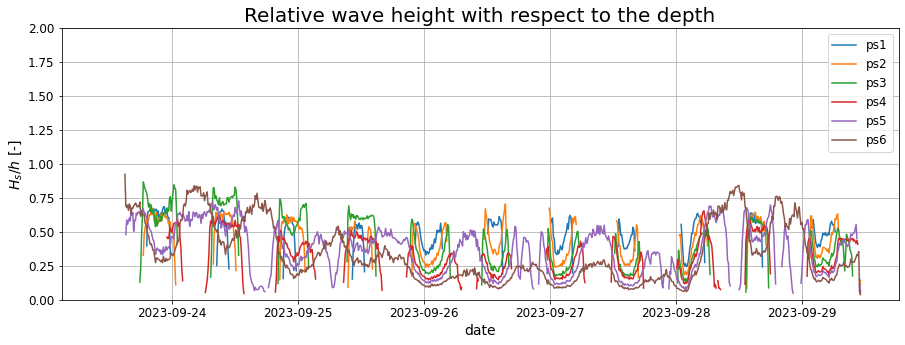

In [13]:
fig, ax = plt.subplots(figsize=(15,5))

ax.set_title('Relative wave height with respect to the depth')

ax.plot(ds1.t, ds1['Hm0'] / ds1['h'], label='ps1')
ax.plot(ds2.t, ds2['Hm0'] / ds2['h'], label='ps2')
ax.plot(ds3.t, ds3['Hm0'] / ds3['h'], label='ps3')
ax.plot(ds4.t, ds4['Hm0'] / ds4['h'], label='ps4')
ax.plot(ds5.t, ds5['Hm0'] / ds5['h'], label='ps5')
ax.plot(ds6.t, ds6['Hm0'] / ds6['h'], label='ps6')

ax.set_ylim(bottom=0, top=2)
ax.grid()


ax.set_xlabel('date')
ax.set_ylabel('$H_s / h$ [-]')

ax.legend(loc='best')

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.savefig('figures/epsilon.png', bbox_inches='tight', facecolor='white', transparent=False)